Creating Datasets (COV-19, TB, P, None)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/drive/MyDrive/UHealthCNNModel/train"

test_path = "/content/drive/MyDrive/UHealthCNNModel/test"

val_path = "/content/drive/MyDrive/UHealthCNNModel/val"

w, h = 244, 244
batch_size = 16

train_img_gen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

test_img_gen = ImageDataGenerator(
    rescale=1./255
)

val_img_gen = ImageDataGenerator(
    rescale=1./255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size=(w, h),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 590.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
Found 6336 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [4]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

View Images

(32, 244, 244, 3)


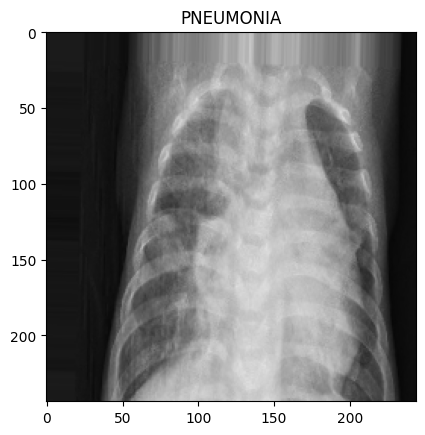

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['COVID19', 'Normal', 'PNEUMONIA', 'TB']

for _ in range(5):
  img, label = next(train_dataset)
  print(img.shape)
  plt.title(classes[np.argmax(label[0])])
  plt.imshow(img[0])
  plt.show()


In [ ]:
train_dataset.image_shape

(244, 244, 3)

CNN Model

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Model instance
CNN_model = Sequential()

# Convolution Layers
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())

CNN_model.add(layers.MaxPooling2D(2, 2))

CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())

CNN_model.add(layers.MaxPooling2D(2, 2))

CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())

CNN_model.add(layers.MaxPooling2D(2, 2))

# Flatten
CNN_model.add(layers.Flatten())

# Node Layer
CNN_model.add(layers.Dense(128, activation='relu'))

# Dropout to prevent overfitting
CNN_model.add(layers.Dropout(0.2))

# Output Layer
CNN_model.add(layers.Dense(4, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
)


# Print model summary
CNN_model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save best model
weight_path = "/drive/MyDrive/UHealth.weights.h5"

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

In [ ]:
# Fit data
history = CNN_model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset,
    callbacks=[model_checkpoint]
)

CNN_model.save_model('/drive/MyDrive/UHealth4.model.h5')

Epoch 1/25
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7032 - loss: 5.0287

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


396/396 ━━━━━━━━━━━━━━━━━━━━ 2785s 7s/step - accuracy: 0.7033 - loss: 5.0222 - val_accuracy: 0.4737 - val_loss: 4.5545
Epoch 2/25
 46/396 ━━━━━━━━━━━━━━━━━━━━ 31:55 5s/step - accuracy: 0.7107 - loss: 1.5574

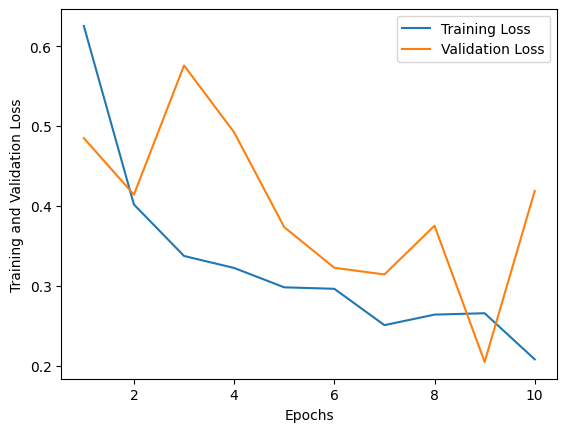

In [7]:
# Plot history
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.history['loss'])
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend()
plt.show()

In [1]:
# Evaluate
CNN_model.evaluate(test_dataset)

NameError: name 'CNN_model' is not defined